In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ageri
Cantonal mean [6.52, 7.18, 6.57, 4.91, 4.36, 4.73, 3.82, 4.16, 4.42, 4.28, 5.15, 6.58]
Landsat mean [4.68, 5.27, 5.63, 4.29, 4.03, 3.96, 3.82, 4.24, 4.34, 5.25, 5.42, 6.06]


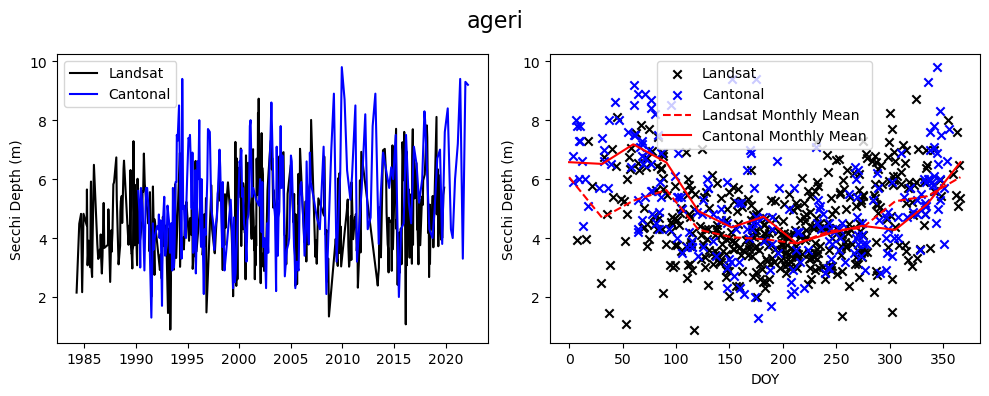

biel
Cantonal mean [5.14, 4.93, 4.53, 4.14, 4.12, 3.24, 3.09, 3.46, 4.39, 5.05, 5.63, 5.17]
Landsat mean [4.79, 3.59, 3.36, 3.1, 3.13, 3.24, 3.07, 3.33, 3.98, 4.33, 4.68, 3.69]


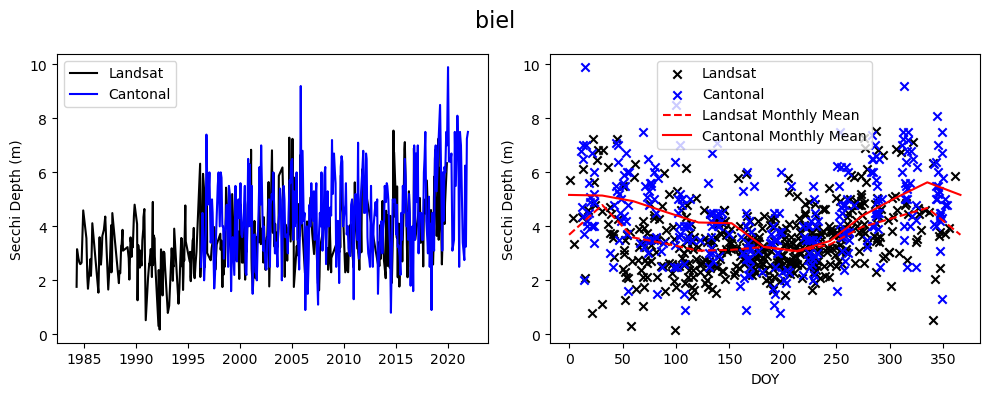

caldonazzo
Landsat mean [4.08, 4.82, 3.81, 3.71, 4.37, 4.68, 4.48, 4.58, 4.81, 4.88, 5.06, 4.8]


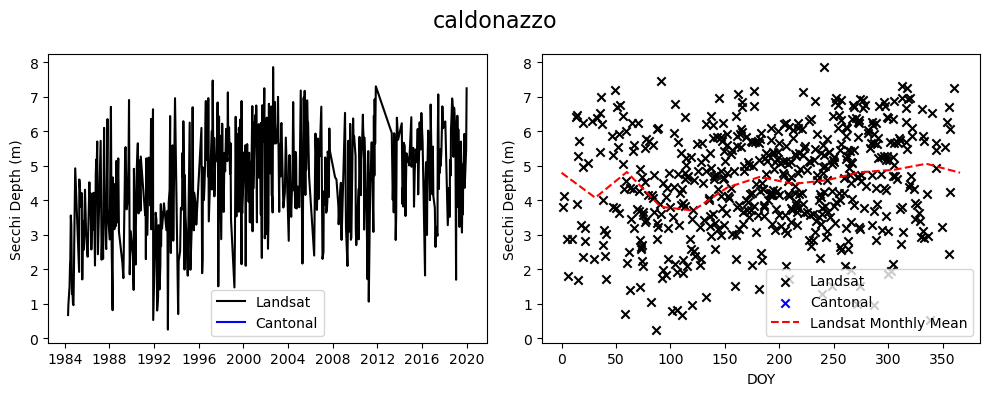

garda
Landsat mean [5.58, 5.55, 5.82, 6.23, 6.05, 6.2, 5.81, 5.69, 6.03, 6.4, 6.29, 5.51]


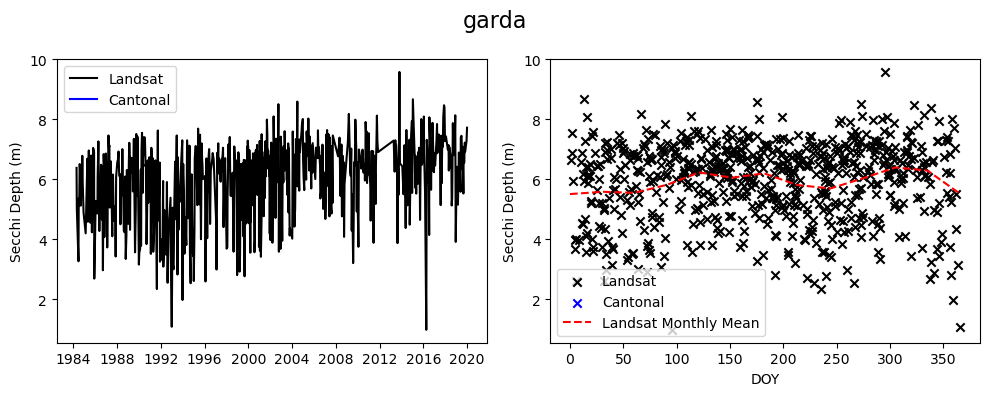

geneva
Cantonal mean [10.18, 10.56, 7.67, 4.26, 5.06, 6.37, 5.61, 5.17, 5.5, 6.65, 7.2, 9.33]
Landsat mean [5.63, 5.56, 5.33, 4.37, 4.76, 5.27, 5.38, 5.16, 5.59, 5.74, 5.77, 5.4]


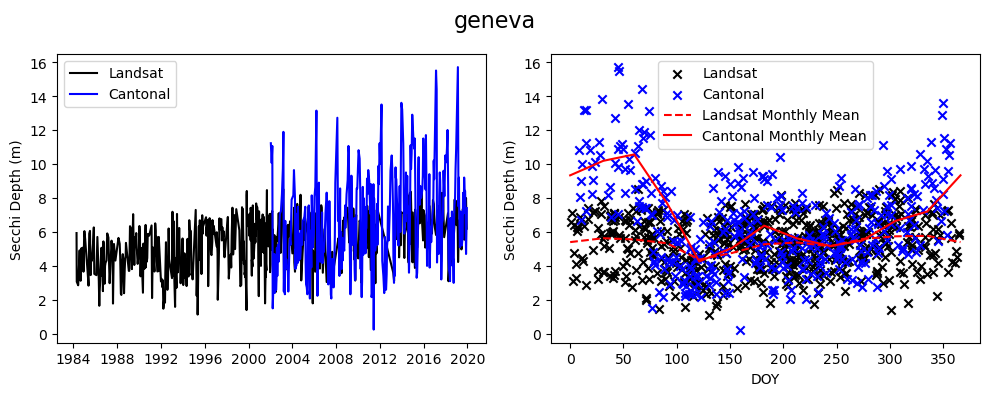

greifensee
Cantonal mean [5.17, 4.51, 3.64, 2.58, 6.01, 4.97, 2.89, 1.77, 1.91, 2.56, 3.95, 4.84]
Landsat mean [5.01, 4.34, 3.58, 3.31, 3.69, 3.5, 2.58, 2.81, 3.69, 4.07, 4.3, 4.73]


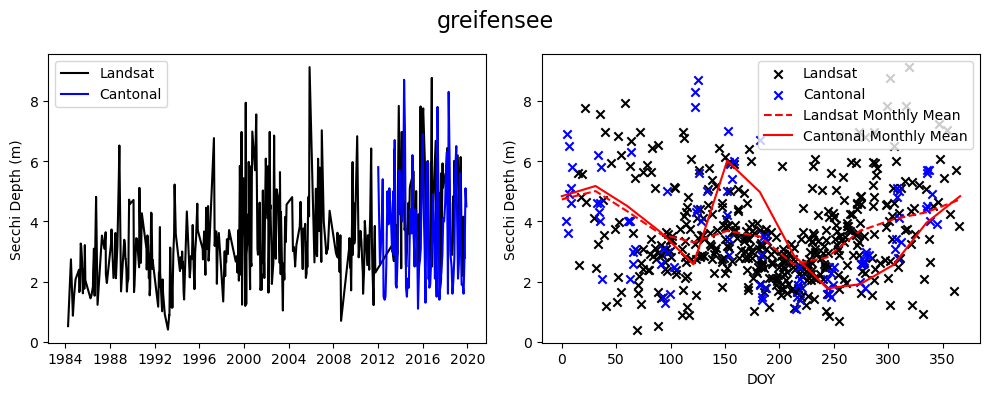

hallwil
Cantonal mean [4.93, 4.37, 3.46, 2.62, 4.26, 5.08, 3.73, 3.23, 3.67, 4.07, 4.0, 4.69]
Landsat mean [4.92, 4.95, 3.75, 2.94, 3.23, 4.09, 3.62, 3.51, 4.0, 4.57, 4.81, 5.17]


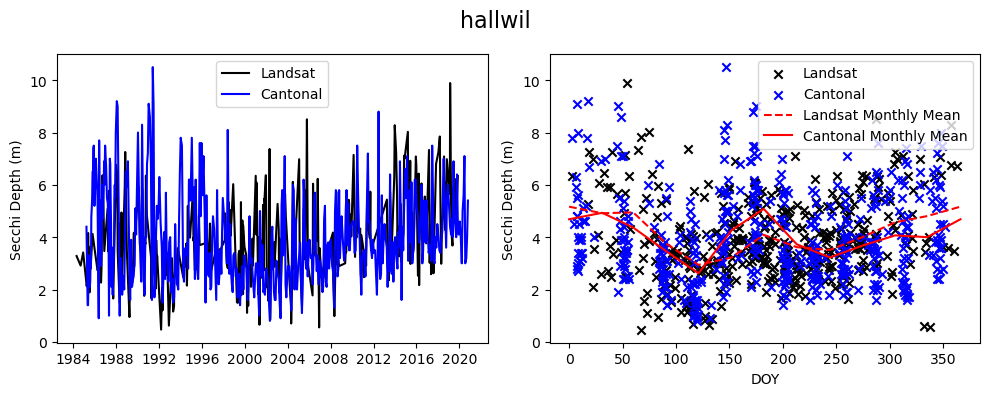

joux
Cantonal mean [1.4, 1.18, 2.02, 2.21, 2.64, 3.87, 3.86, 2.88, 2.77, 2.68, 2.63, 2.2]
Landsat mean [3.3, 3.34, 2.5, 2.84, 3.14, 3.64, 3.62, 3.01, 3.51, 3.73, 4.04, 3.7]


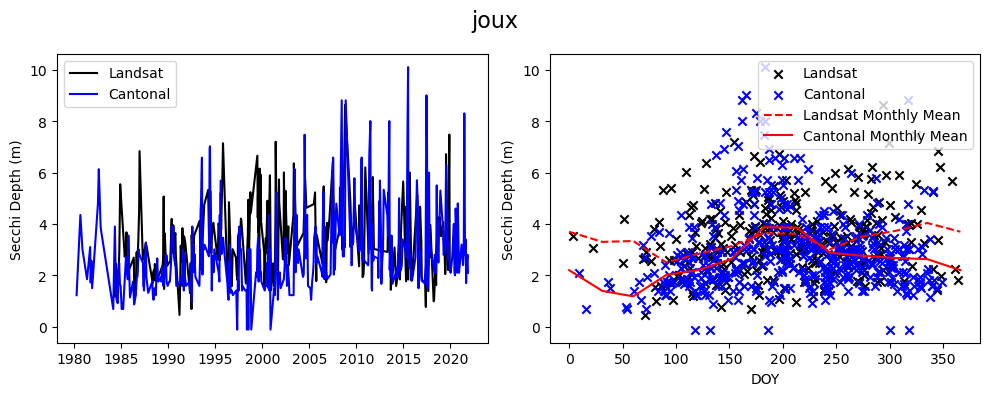

lugano
Cantonal mean [8.21, 10.28, 8.74, 7.71, 7.03, 4.88, 5.21, 5.08, 6.15, 6.95, 7.76, 7.85]
Landsat mean [5.46, 5.2, 4.88, 3.94, 4.32, 4.28, 4.26, 4.32, 4.36, 5.18, 4.58, 4.03]


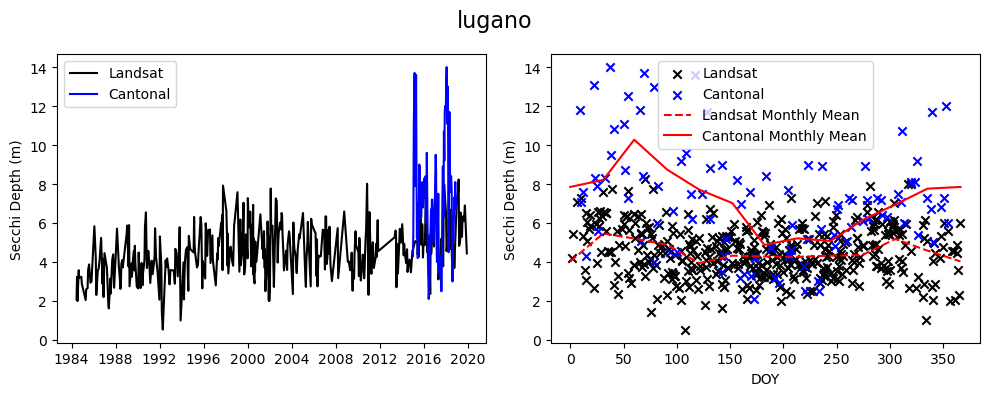

murten
Cantonal mean [4.03, 3.63, 3.52, 3.08, 3.35, 3.31, 2.45, 2.38, 3.11, 3.89, 4.85, 4.39]
Landsat mean [3.86, 3.13, 2.39, 2.49, 2.86, 3.11, 2.48, 2.55, 3.54, 4.05, 3.93, 4.86]


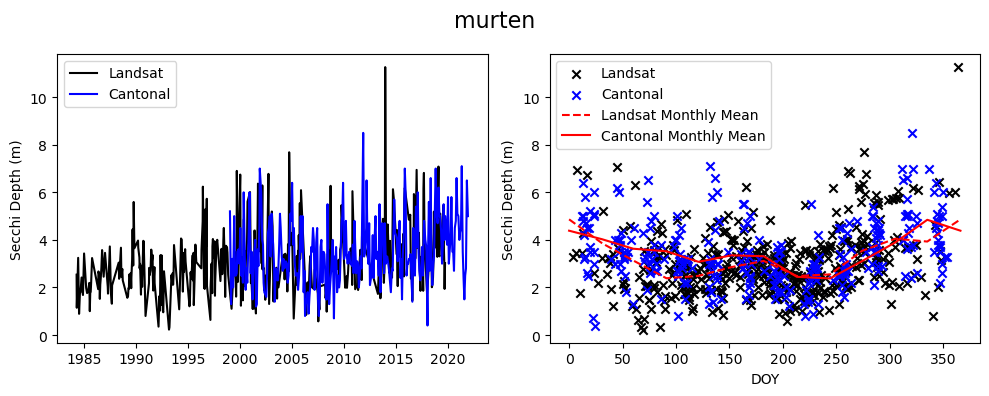

stmoritz
Cantonal mean [5.4, 4.44, 4.4, 9.1, 9.6, 9.82]
Landsat mean [5.22, 4.99, 5.43, 4.89, 5.33, 5.57, 5.91, 5.73, 5.66, 4.9]


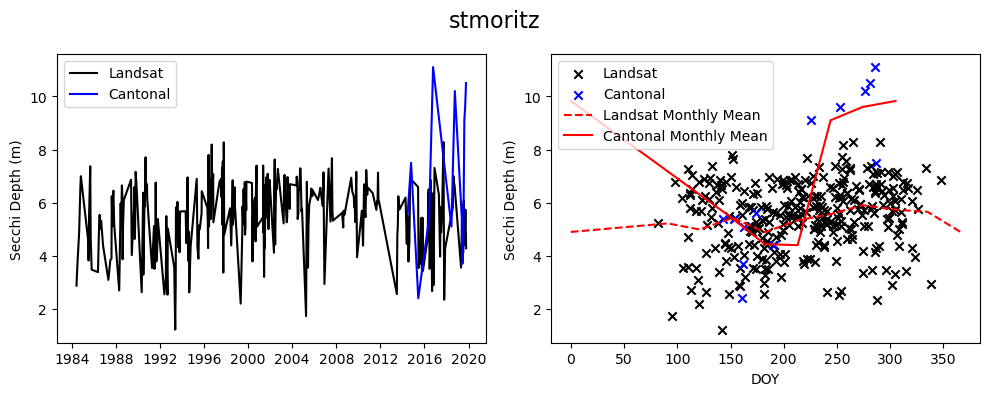

zurich
Cantonal mean [6.19, 6.81, 6.6, 4.16, 5.38, 6.44, 4.93, 3.48, 3.88, 4.01, 3.62, 4.51]
Landsat mean [4.86, 4.82, 4.05, 3.76, 4.2, 4.6, 4.15, 3.86, 4.4, 4.77, 4.92, 6.03]


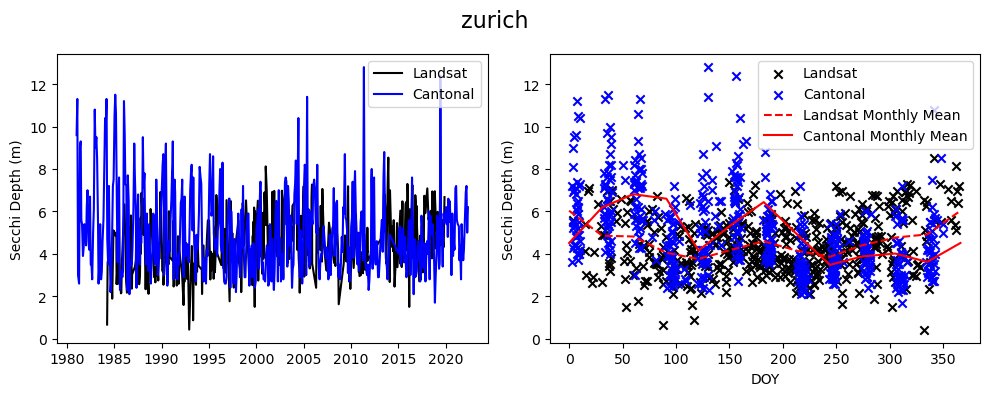

In [41]:
static = "../static/delft3d-flow"
cantonal = "../externaldata/cantonal_secchi.csv"
landsat = "../externaldata/landsat_secchi.csv"
lakes = [l for l in os.listdir(static) if "." not in l]
lakes.sort()
df_c = pd.read_csv(cantonal)
df_l = pd.read_csv(landsat)

df_c["time"] = pd.to_datetime(df_c['time'])
df_c['doy'] = df_c['time'].dt.dayofyear
df_c['fake_date'] = pd.to_datetime(df_c['doy'], origin=f'2000-01-01', unit='D')
df_c = df_c.sort_values(by='time')

df_l["time"] = pd.to_datetime(df_l['time'])
df_l['doy'] = df_l['time'].dt.dayofyear
df_l['fake_date'] = pd.to_datetime(df_l['doy'], origin=f'2000-01-01', unit='D')
df_l = df_l.sort_values(by='time')

for lake in lakes:
    print(lake)
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    df_c_l = df_c[df_c['key'] == lake]
    df_l_l = df_l[df_l['key'] == lake]

    if len(df_c_l) > 0:
        df_c_lm = df_c_l.set_index('fake_date')
        mean_c = df_c_lm['value'].resample('M').mean()
        mean_c_doy = list(mean_c.index.dayofyear)
        mean_c_doy.insert(0, 0)
        mean_c = list(mean_c)
        print("Cantonal mean", [round(element, 2) for element in mean_c])
        mean_c.insert(0, mean_c[-1])

    df_l_lm = df_l_l.set_index('fake_date')
    mean_l = df_l_lm['value'].resample('M').mean()
    if len(mean_l) == 13:
        mean_l = mean_l[:-1]
    mean_l_doy = list(mean_l.index.dayofyear)
    mean_l_doy.insert(0, 0)
    mean_l = list(mean_l)
    print("Landsat mean", [round(element, 2) for element in mean_l])
    mean_l.insert(0, mean_l[-1])

    axes[0].plot(df_l_l["time"], df_l_l["value"], label="Landsat", color="k")
    axes[0].plot(df_c_l["time"], df_c_l["value"], label="Cantonal", color="b")
    axes[0].set_ylabel("Secchi Depth (m)")
    axes[0].legend()

    axes[1].scatter(df_l_l["doy"], df_l_l["value"], label="Landsat", marker="x", color="k")
    axes[1].scatter(df_c_l["doy"], df_c_l["value"], label="Cantonal", marker="x", color="b")
    axes[1].plot(mean_l_doy, mean_l, label="Landsat Monthly Mean", color="r", linestyle='--')
    if len(df_c_l) > 0:
        axes[1].plot(mean_c_doy, mean_c, label="Cantonal Monthly Mean", color="r")
    axes[1].set_xlabel("DOY")
    axes[1].set_ylabel("Secchi Depth (m)")
    axes[1].legend()

    plt.suptitle(lake, fontsize=16)
    plt.tight_layout()
    plt.savefig('../static/delft3d-flow/{}/secchi.png'.format(lake))
    plt.show()

